### Assignment 1 (4 scores):

- Use Numpy only to construct the Logistic Regression model.
- Train that Logistic Regression model dataset using the Gradient Descend approach on the [Predict students’ dropout and academic success](https://archive.ics.uci.edu/dataset/697/predict+students+dropout+and+academic+success) dataset. *Note that three class in this dataset must be merge into two class as: graduate and non-graduate (dropout or enroll)*.
- Evaluate that Logistic Regression model on the [Predict students’ dropout and academic success](https://archive.ics.uci.edu/dataset/697/predict+students+dropout+and+academic+success) dataset.
- Visualize the loss function of the training process.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv('data.csv', sep=';')
data.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance	                     4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nacionality                                     4424 non-null   int64  
 8   Mother's qualification                          4424 non-null   int64  
 9   Father's qualification                   

### Preprocessing data

In [4]:
data.isnull().sum()

Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance\t                      0
Previous qualification                            0
Previous qualification (grade)                    0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Admission grade                                   0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                                0
Age at enrol

In [5]:
data.dtypes

Marital status                                      int64
Application mode                                    int64
Application order                                   int64
Course                                              int64
Daytime/evening attendance\t                        int64
Previous qualification                              int64
Previous qualification (grade)                    float64
Nacionality                                         int64
Mother's qualification                              int64
Father's qualification                              int64
Mother's occupation                                 int64
Father's occupation                                 int64
Admission grade                                   float64
Displaced                                           int64
Educational special needs                           int64
Debtor                                              int64
Tuition fees up to date                             int64
Gender        

In [6]:
data['Target'].value_counts()

Target
Graduate    2209
Dropout     1421
Enrolled     794
Name: count, dtype: int64

In [7]:
def encode_target (val:str) -> int:
    if val == 'Enrolled' or val == 'Dropout':
        return 0
    return 1

data['Target'] = data['Target'].apply(encode_target)

In [8]:
data['Target'].unique()

array([0, 1])

In [9]:
data.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,0
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,1
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,0
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,1
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,1


### Normalization

In [10]:
# chỉ chuẩn hóa cột liên tục (số thực) (ko dùng với cột rời rạc (số nguyên))
for continue_col in data.columns:
    if data[continue_col].dtype == np.float64:
        data[continue_col] = (data[continue_col] - data[continue_col].mean()) / data[continue_col].std()

### Seperation train/test 

In [11]:
X = data.iloc[: , :-1]
X.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
0,1,17,5,171,1,1,-0.804750,1,19,12,...,0,0,0,0,0,-1.963267,0,-0.287606,0.124372,0.765674
1,1,15,1,9254,1,1,2.076585,1,1,3,...,0,0,6,6,6,0.659487,0,0.876123,-1.105097,0.347160
2,1,1,5,9070,1,1,-0.804750,1,37,37,...,0,0,6,0,0,-1.963267,0,-0.287606,0.124372,0.765674
3,1,17,2,9773,1,1,-0.804750,1,38,37,...,0,0,6,10,5,0.416403,0,-0.813161,-1.466705,-1.375356
4,2,39,1,8014,0,1,-2.472892,1,37,38,...,0,0,6,6,6,0.531548,0,0.876123,-1.105097,0.347160


In [12]:
X = X.to_numpy()
X.shape

(4424, 36)

In [13]:
Y = data.iloc[:, -1]
Y.head()

0    0
1    1
2    0
3    1
4    1
Name: Target, dtype: int64

In [14]:
Y = Y.to_numpy()
Y.shape

(4424,)

In [15]:
N = int(0.8 * X.shape[0])
X_train, X_test = np.array_split(X, [N])
y_train, y_test = np.array_split(Y, [N])

In [16]:
print('Train: ', X_train.shape, y_train.shape)
print('Test: ', X_test.shape, y_test.shape)

Train:  (3539, 36) (3539,)
Test:  (885, 36) (885,)


### Building Logistic Regression

In [17]:
class LR:
    def __init__(self, epoch: int, lr: float) -> None:
        self.epoch = epoch
        self.lr = lr
        self.losses = []
        self.metrics = []

    def sigmoid(self, z: np.ndarray) -> np.ndarray:
        return 1/(1 + np.exp(-z))
    
    def loss_function(self, y: np.ndarray, y_hat: np.ndarray) -> float:
        return -(y * np.log(y_hat + 10e-5) + (1 - y) * np.log(1 - y_hat + 10e-5)).mean()
    
    def accuracy(self, y: np.ndarray, y_hat: np.ndarray) -> float:
        return (1 - np.abs(y - y_hat).mean())
    
    def fit(self, X: np.ndarray, y: np.ndarray) -> None:
        n = X.shape[0] # số lượng mẫu
        d = X.shape[1] # số thuộc tính
        self.theta = np.zeros((d, 1))
        for e in range(self.epoch):
            # Forward
            y_hat = self.predict(X)
            # Backward
            diff = y_hat - y
            gradient = (1/n) * np.matmul(X.T, diff)
            self.theta -= self.lr * gradient
            # Evaluating
            y_hat = self.predict(X)
            loss = self.loss_function(y, y_hat)
            acc = self.accuracy(y, y_hat)
            self.losses.append(loss)
            self.metrics.append(acc)

    def predict(self, X: np.ndarray) -> np.ndarray:
        z = np.matmul(X, self.theta)
        y_hat = self.sigmoid(z)
        return y_hat

In [18]:
logistic_reg = LR(500, 0.01)
logistic_reg.fit(X_train, y_train[:, None])

C:\Users\Nguyen Tram\AppData\Local\Temp\ipykernel_6092\1138172137.py:9: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-z))


<Axes: >

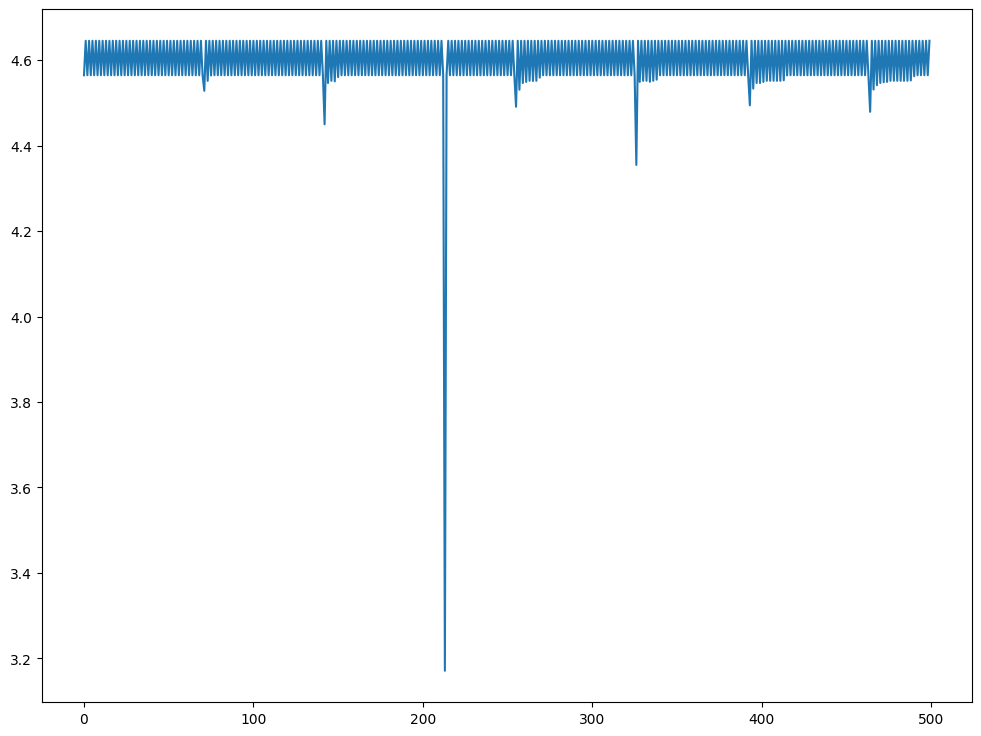

In [19]:
plt.figure(figsize=(12,9))
sns.lineplot(logistic_reg.losses)

In [20]:
y_hat_test = logistic_reg.predict(X_test)

C:\Users\Nguyen Tram\AppData\Local\Temp\ipykernel_6092\1138172137.py:9: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-z))


In [21]:
accuracy = logistic_reg.accuracy(y_test, y_hat_test)
print('Accuracy: ', accuracy)

Accuracy:  0.5209039548022598
